# Satellite Images Segment Anything Automatic Mask

https://github.com/facebookresearch/segment-anything<br/>
https://arxiv.org/abs/2304.02643

In [1]:
!pip install git+https://github.com/facebookresearch/segment-anything.git

  Cloning https://github.com/facebookresearch/segment-anything.git to /tmp/pip-req-build-utwge6lr
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything.git /tmp/pip-req-build-utwge6lr
  Resolved https://github.com/facebookresearch/segment-anything.git to commit 6fdee8f2727f4506cfbbe553e23b895e27956588
  Preparing metadata (setup.py) ... done
  Created wheel for segment-anything: filename=segment_anything-1.0-py3-none-any.whl size=36621 sha256=076152485c2ef7cc10c5c2b25959cb3b3290a2b8880d8ee26915c786c2719f98
  Stored in directory: /tmp/pip-ephem-wheel-cache-p9m5k9ch/wheels/6e/b2/38/082465c177a067501384fd15cb18be1128372ef60f27a1c426
Successfully built segment-anything


In [2]:
import os
import random
import cv2
import sys
from segment_anything import sam_model_registry 
from segment_anything import SamAutomaticMaskGenerator
from segment_anything import SamPredictor
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets, transforms, models
from torchvision.utils import make_grid
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [3]:
def show_anns(anns, axes=None):
    if len(anns) == 0:
        return
    if axes:
        ax = axes
    else:
        ax = plt.gca()
        ax.set_autoscale_on(False)
    sorted_anns = sorted(anns, key=(lambda x: x['area']), reverse=True)
    polygons = []
    color = []
    for ann in sorted_anns:
        m = ann['segmentation']
        img = np.ones((m.shape[0], m.shape[1], 3))
        color_mask = np.random.random((1, 3)).tolist()[0]
        for i in range(3):
            img[:,:,i] = color_mask[i]
        ax.imshow(np.dstack((img, m*0.5)))

def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)

    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   

    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

In [4]:
paths0=[]
for dirname, _, filenames in os.walk('/kaggle/input/wildfire-prediction-dataset/test/nowildfire'):
    for filename in filenames:
        if filename[-4:]=='.jpg':
            paths0+=[(os.path.join(dirname, filename))]
paths=random.sample(paths0,100)

In [5]:
sam_checkpoint = "/kaggle/input/segment-anything-models/sam_vit_h_4b8939.pth"
model_type = "vit_h" #
device = "cpu" #cpu,cuda

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)
mask_generator1 = SamAutomaticMaskGenerator(sam)

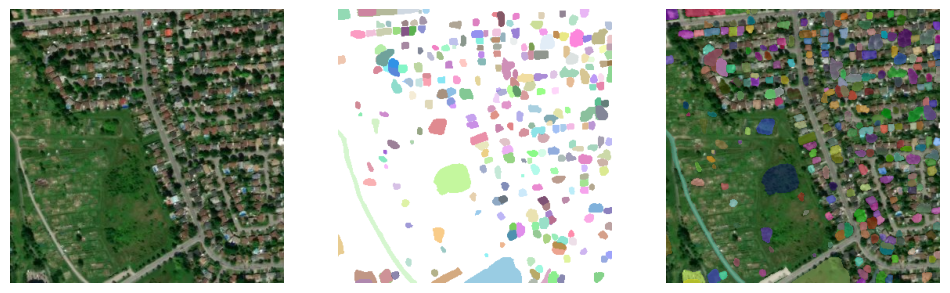

In [ ]:
for path in paths[0:5]:
    image=cv2.imread(path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    masks1 = mask_generator1.generate(image)
    #plt.figure(figsize=(6,6))
    fig, axs = plt.subplots(1,3,figsize=(12,4))
    axs[0].imshow(image)
    axs[2].imshow(image) 
    show_anns(masks1,axs[1])
    show_anns(masks1,axs[2])
    axs[0].axis('off')
    axs[1].axis('off')    
    axs[2].axis('off')    
    #plt.axis('off')
    plt.show()